In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

     ------------------------------------ 266.3/266.3 MB 323.9 kB/s eta 0:00:00
     -------------------------------------- 65.5/65.5 kB 122.0 kB/s eta 0:00:00
     -------------------------------------- 57.5/57.5 kB 177.6 kB/s eta 0:00:00
     ------------------------------------ 124.6/124.6 kB 236.3 kB/s eta 0:00:00
     ---------------------------------------- 6.0/6.0 MB 401.2 kB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 346.0 kB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 391.3 kB/s eta 0:00:00
     -------------------------------------- 14.2/14.2 MB 306.5 kB/s eta 0:00:00
     ------------------------------------ 439.2/439.2 kB 174.9 kB/s eta 0:00:00
     ------------------------------------ 781.3/781.3 kB 278.8 kB/s eta 0:00:00
     ------------------------------------ 151.7/151.7 kB 335.2 kB/s eta 0:00:00



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
df=pd.read_csv('Employee.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


# Data visualization

## Notes about df's changes.
* Attrition: 1 = yes, 0 = no

In [4]:
# Changes
df['Attrition']=df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)
# Attrition: 1 = yes, 0 = no
df['OverTime']=df['OverTime'].apply(lambda x: 1 if x == 'Yes' else 0)
# OverTime: 1 = yes, 0 = no
df['Over18']=df['Over18'].apply(lambda x: 1 if x == 'Y' else 0)
# OverTime: 1 = yes, 0 = no

<AxesSubplot:>

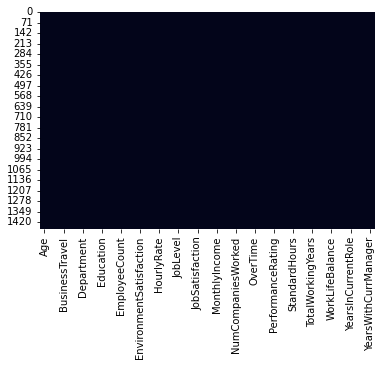

In [5]:
sns.heatmap(df.isnull(),cbar=False)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
print('Is not a number','\n',df.isna().sum()),print('Is null','\n',df.isnull().sum())

Is not a number 
 Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole    

(None, None)

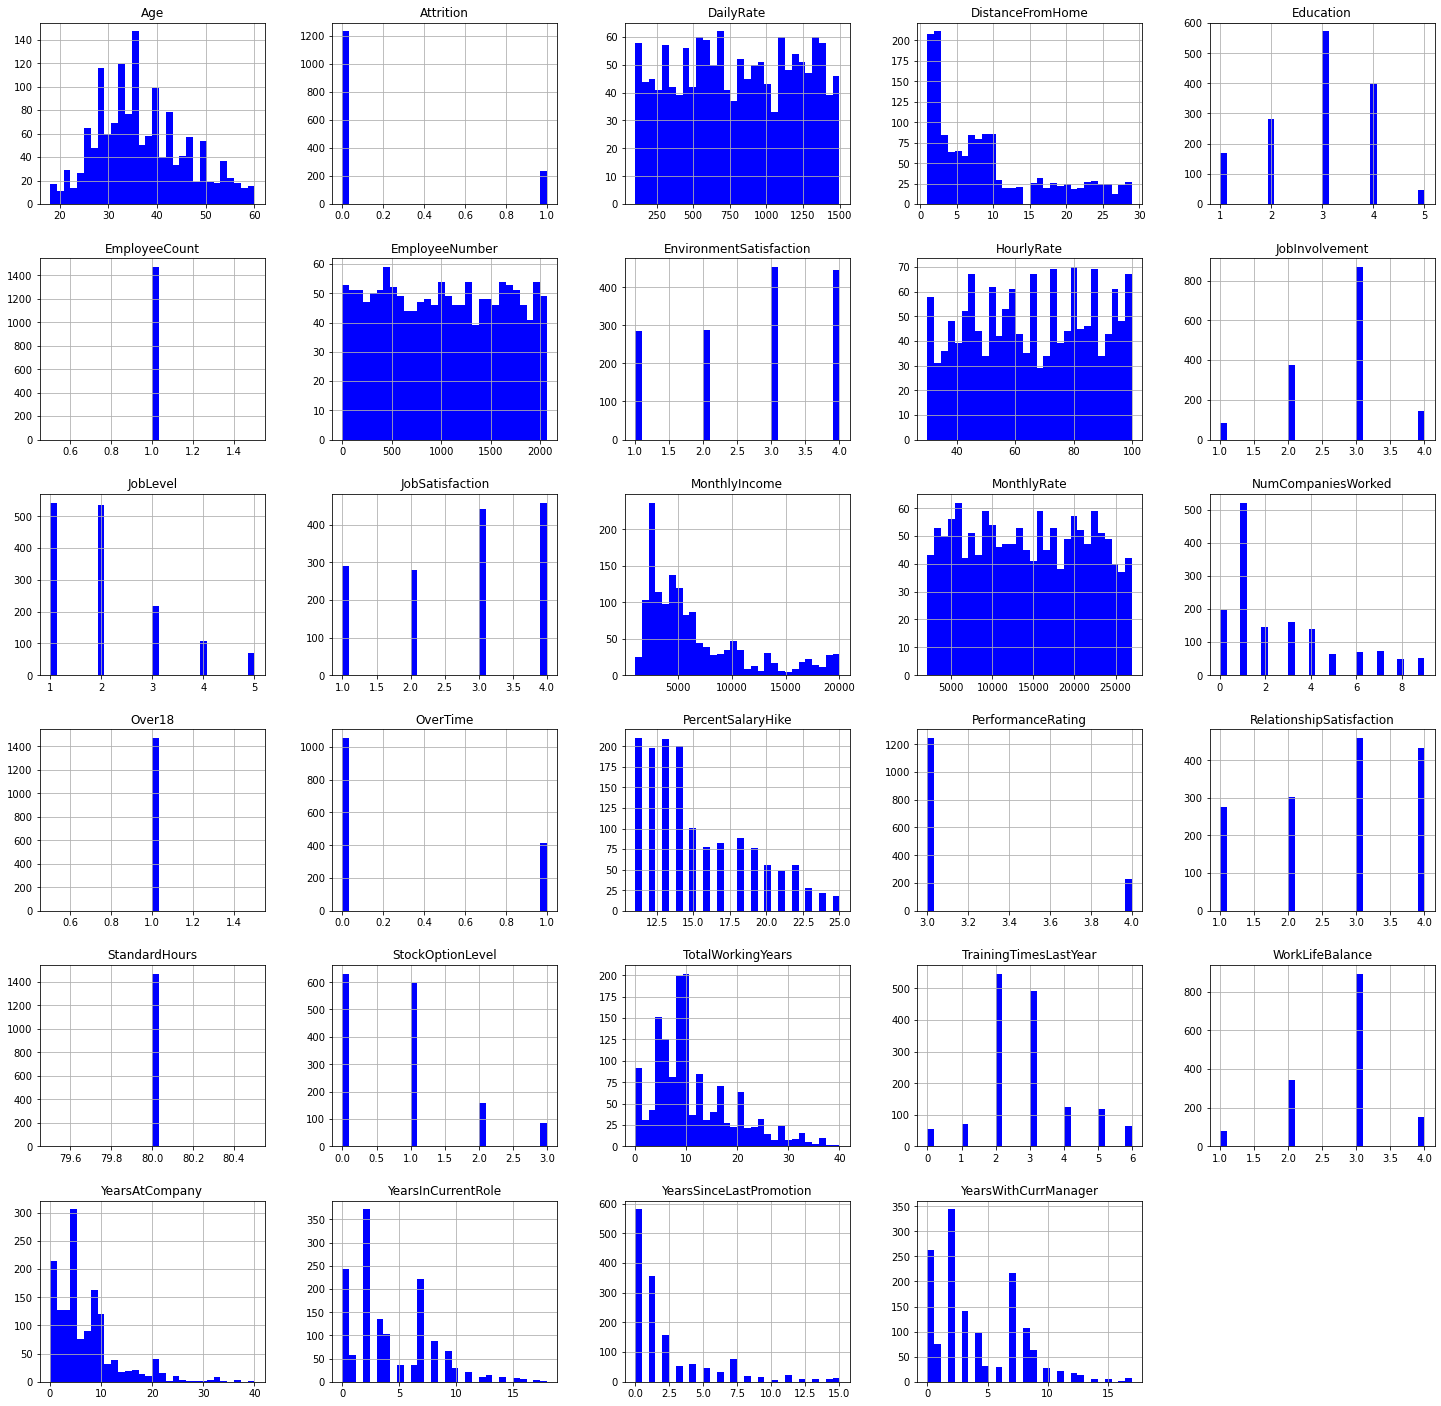

In [8]:
df.hist(bins=30,figsize=(25,25), color='blue');

In [9]:
# Drop irrelevante columns
df.drop(columns=(['EmployeeCount','StandardHours','Over18','EmployeeNumber']), axis=1, inplace = True)

In [10]:
cat=df.columns
for feat in cat:
    print(f"Values Counts for [{feat}]")
    print(df[feat].value_counts())
    print("\n\n")

Values Counts for [Age]
35    78
34    77
36    69
31    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
25    26
24    26
49    24
47    24
55    22
51    19
53    19
48    19
54    18
52    18
22    16
56    14
23    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64



Values Counts for [Attrition]
0    1233
1     237
Name: Attrition, dtype: int64



Values Counts for [BusinessTravel]
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64



Values Counts for [DailyRate]
691     6
408     5
530     5
1329    5
1082    5
       ..
650     1
279     1
316     1
314     1
628     1
Name: DailyRate, Length: 886, dtype: int64



Values Counts for [Department]
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dty

In [11]:
left_df=df[df['Attrition']==1]
stayed_df=df[df['Attrition']==0]

In [12]:
print('total: ',len(df))
print('Employees who left from company: ',len(left_df))
print('Rate of employees who left from company: ', (len(left_df)/len(df))*100)
print('Employees who stayed from company: ',len(stayed_df))
print('Rate of employees who stayed at company: ', (len(stayed_df)/len(df))*100)

total:  1470
Employees who left from company:  237
Rate of employees who left from company:  16.122448979591837
Employees who stayed from company:  1233
Rate of employees who stayed at company:  83.87755102040816


In [13]:
left_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,...,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,1.0,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,...,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,0.0,401.899519,8.452525,1.008244,1.169791,20.099958,0.773405,0.940594,1.118058,...,0.363735,1.125437,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,1.0,103.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.0,408.000000,3.000000,2.000000,1.000000,50.000000,2.000000,1.000000,1.000000,...,3.000000,2.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,1.0,699.000000,9.000000,3.000000,3.000000,66.000000,3.000000,1.000000,3.000000,...,3.000000,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1.0,1092.000000,17.000000,4.000000,4.000000,84.000000,3.000000,2.000000,3.000000,...,3.000000,4.000000,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1.0,1496.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


In [14]:
stayed_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,...,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,0.0,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,...,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,0.0,403.208379,8.012633,1.027002,1.071132,20.380754,0.692050,1.117933,1.093277,...,0.360408,1.071603,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,0.0,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.0,477.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.0,817.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,0.0,1176.000000,13.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,...,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,0.0,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


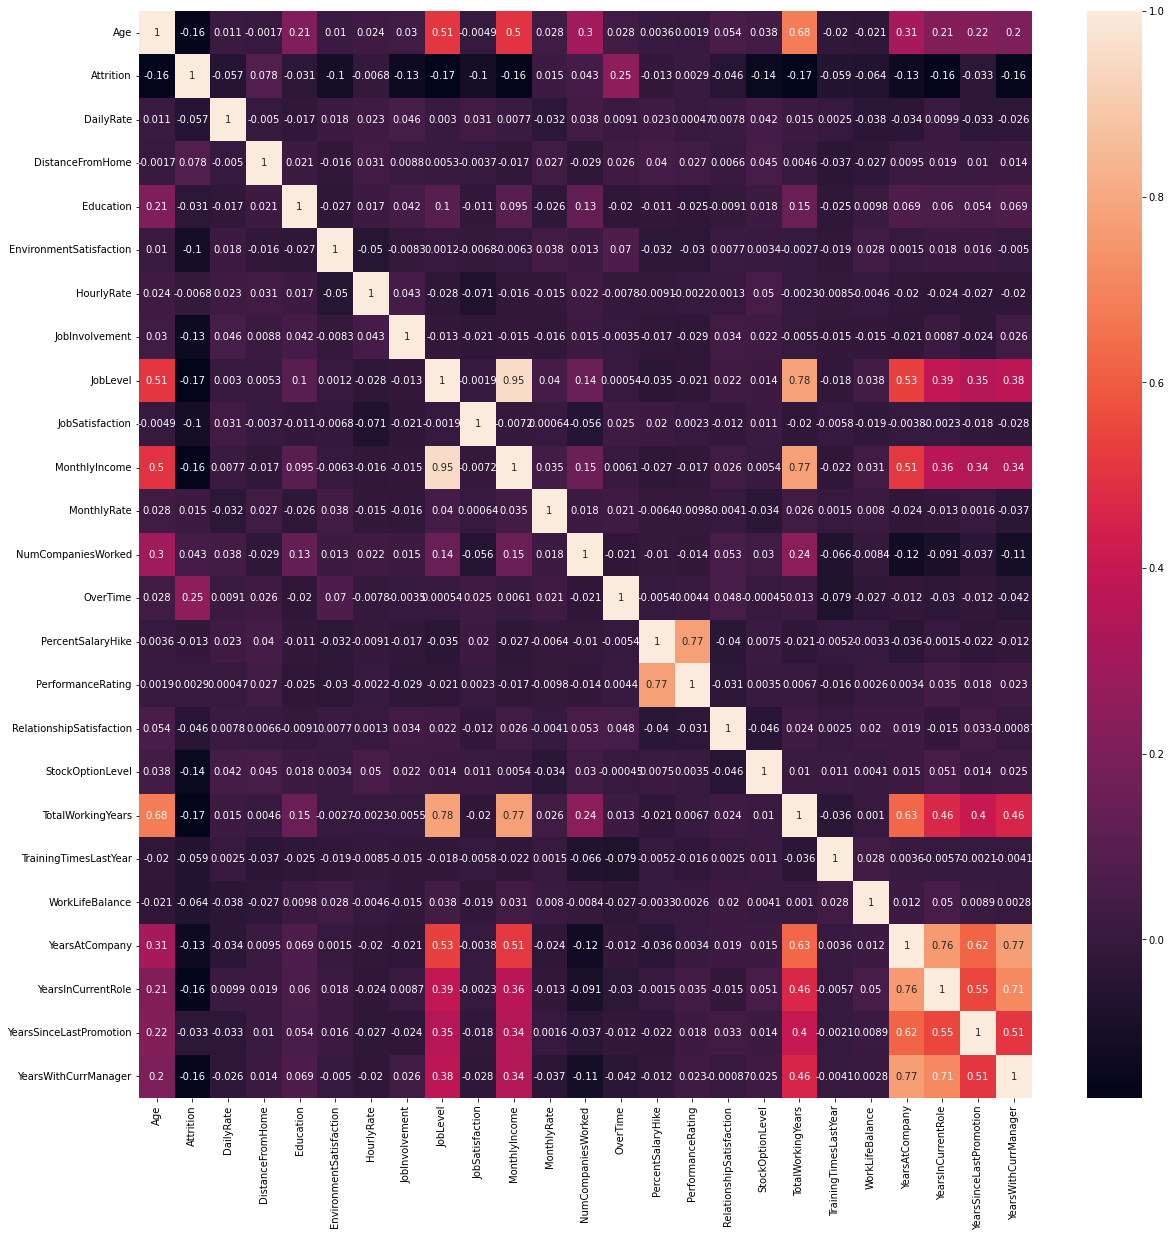

In [15]:
correlation=df.corr()
f,ax=plt.subplots(figsize=(20,20))
sns.heatmap(correlation, annot=True);

In [16]:
df.corr()['Attrition'].sort_values(ascending=False)

Attrition                   1.000000
OverTime                    0.246118
DistanceFromHome            0.077924
NumCompaniesWorked          0.043494
MonthlyRate                 0.015170
PerformanceRating           0.002889
HourlyRate                 -0.006846
PercentSalaryHike          -0.013478
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
YearsAtCompany             -0.134392
StockOptionLevel           -0.137145
YearsWithCurrManager       -0.156199
Age                        -0.159205
MonthlyIncome              -0.159840
YearsInCurrentRole         -0.160545
JobLevel                   -0.169105
TotalWorkingYears          -0.171063
Name: Attrition, dtype: float64

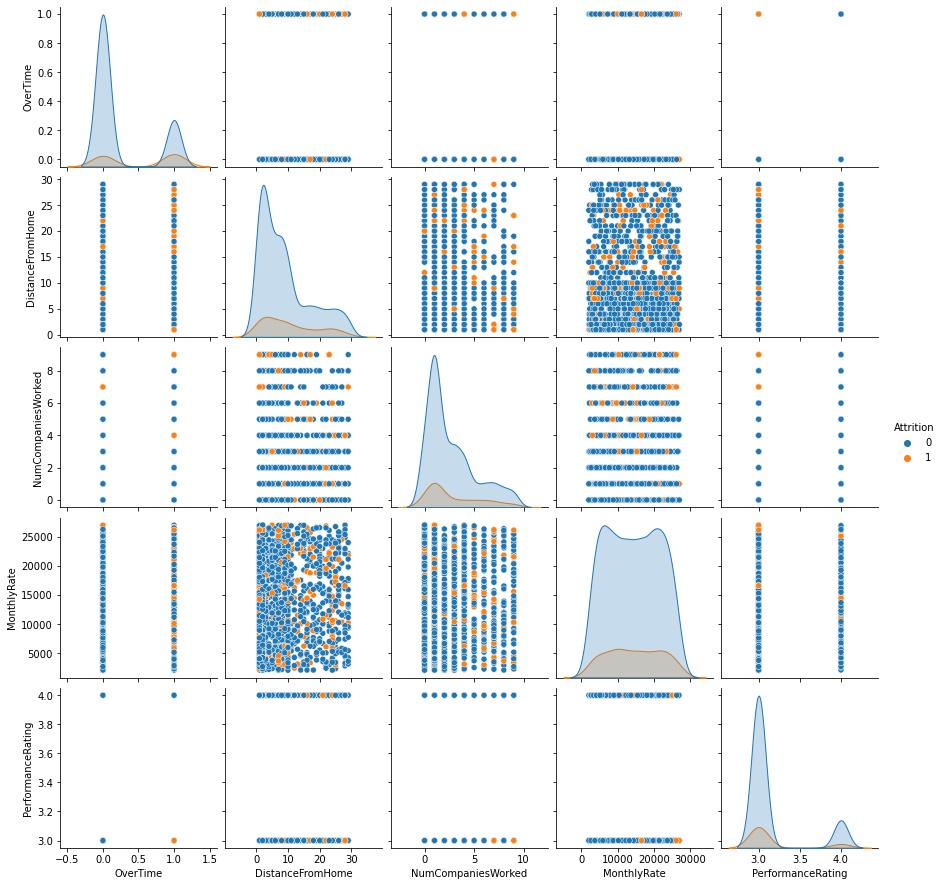

In [17]:
high_corr = ['Attrition','OverTime','DistanceFromHome','NumCompaniesWorked','Gender','MonthlyRate','PerformanceRating']
sns.pairplot(df[high_corr],hue='Attrition');

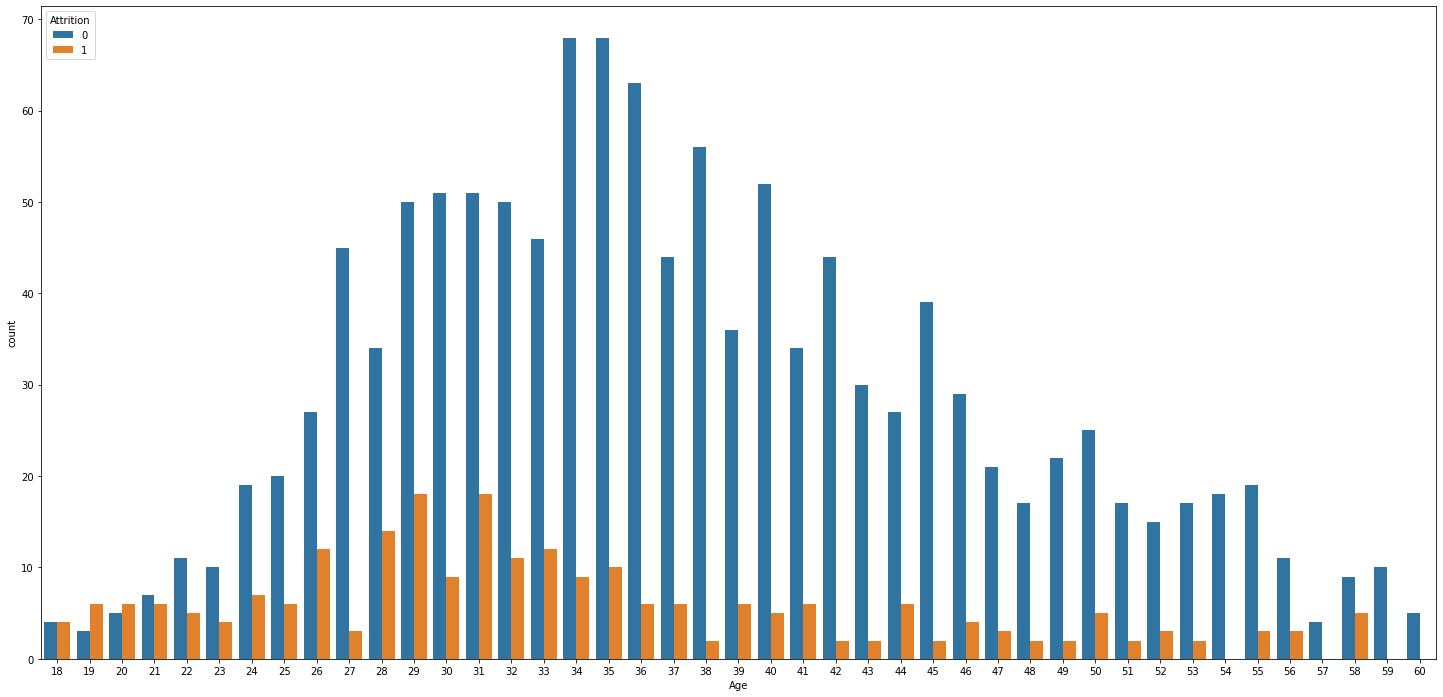

In [18]:
plt.figure(figsize=[25,12])
sns.countplot(x='Age', hue='Attrition',data=df);

<AxesSubplot:xlabel='JobLevel', ylabel='count'>

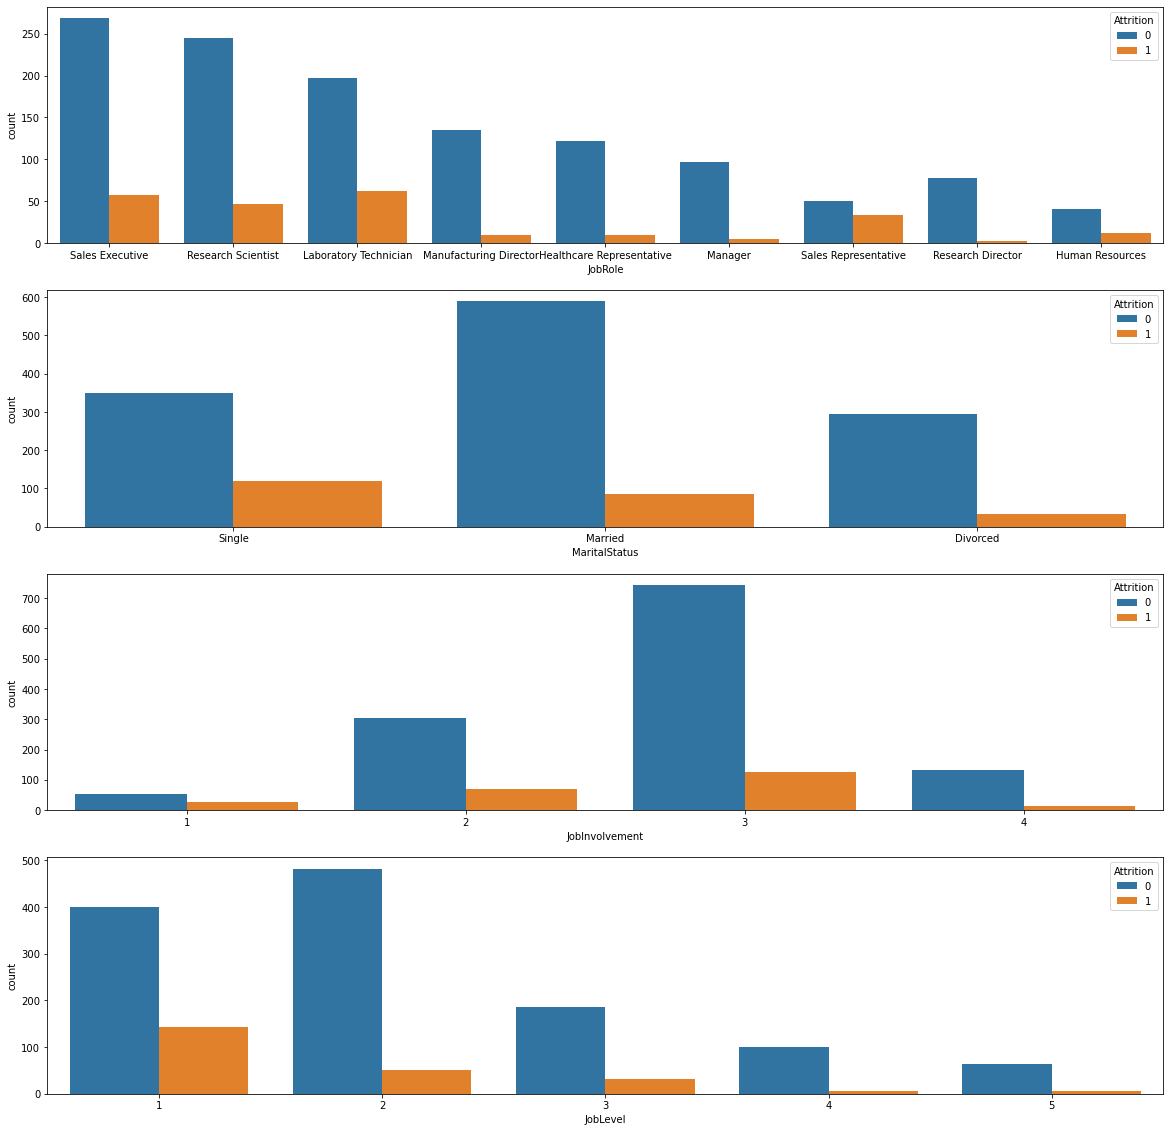

In [19]:
plt.figure(figsize=[20,20])
plt.subplot(411)
sns.countplot(x='JobRole',hue='Attrition',data=df)
plt.subplot(412)
sns.countplot(x='MaritalStatus',hue='Attrition',data=df)
plt.subplot(413)
sns.countplot(x='JobInvolvement',hue='Attrition',data=df)
plt.subplot(414)
sns.countplot(x='JobLevel',hue='Attrition',data=df)

<AxesSubplot:xlabel='DistanceFromHome', ylabel='Density'>

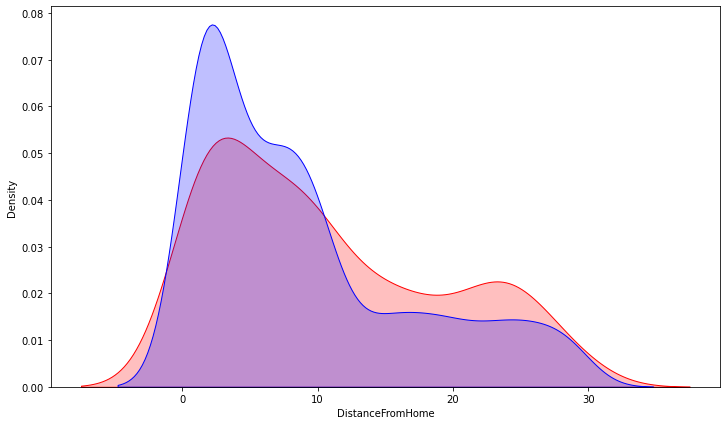

In [20]:
#KDE (kernel density estimator)
plt.figure(figsize=(12,7))
sns.kdeplot(left_df['DistanceFromHome'],label='Funcionários que sairam da empresa', shade=True,color='red')
sns.kdeplot(stayed_df['DistanceFromHome'],label='Funcionários que sairam da empresa', shade=True,color='blue')

<AxesSubplot:xlabel='TotalWorkingYears', ylabel='Density'>

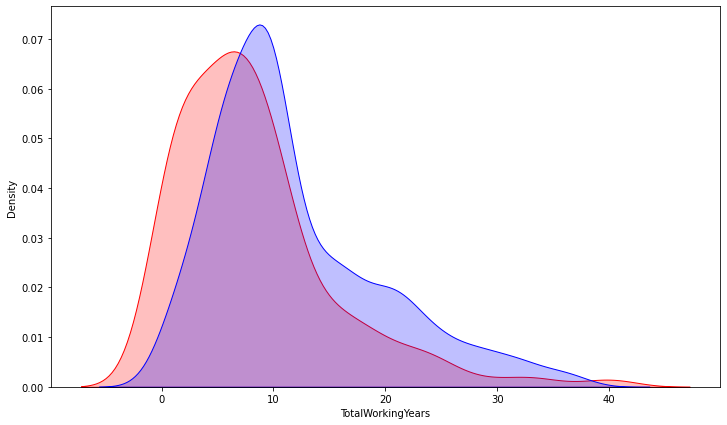

In [21]:
plt.figure(figsize=(12,7))
sns.kdeplot(left_df['TotalWorkingYears'],label='Funcionários que sairam da empresa', shade=True,color='red')
sns.kdeplot(stayed_df['TotalWorkingYears'],label='Funcionários que sairam da empresa', shade=True,color='blue')

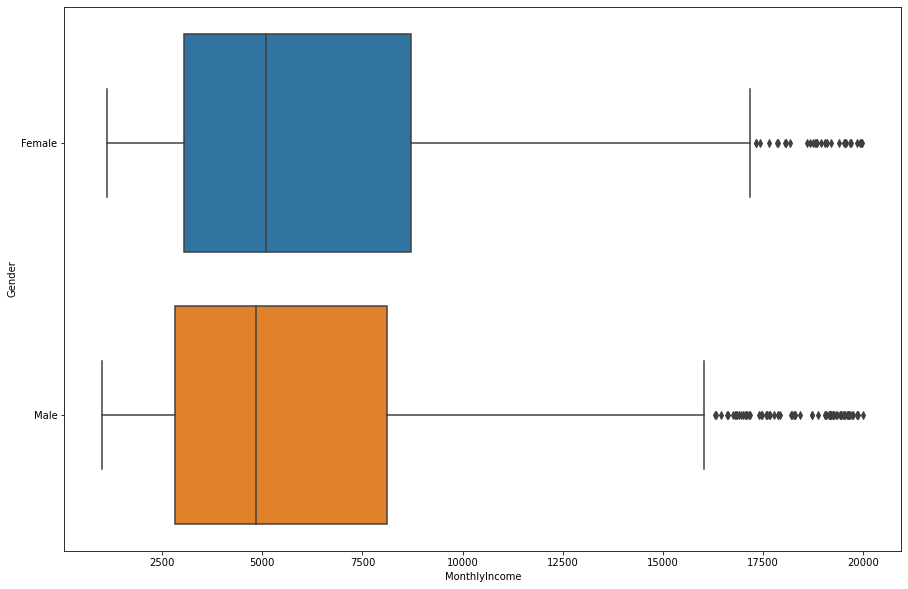

In [22]:
plt.figure(figsize=(15,10))
sns.boxplot(x='MonthlyIncome',y='Gender',data=df);

<AxesSubplot:xlabel='MonthlyIncome', ylabel='JobRole'>

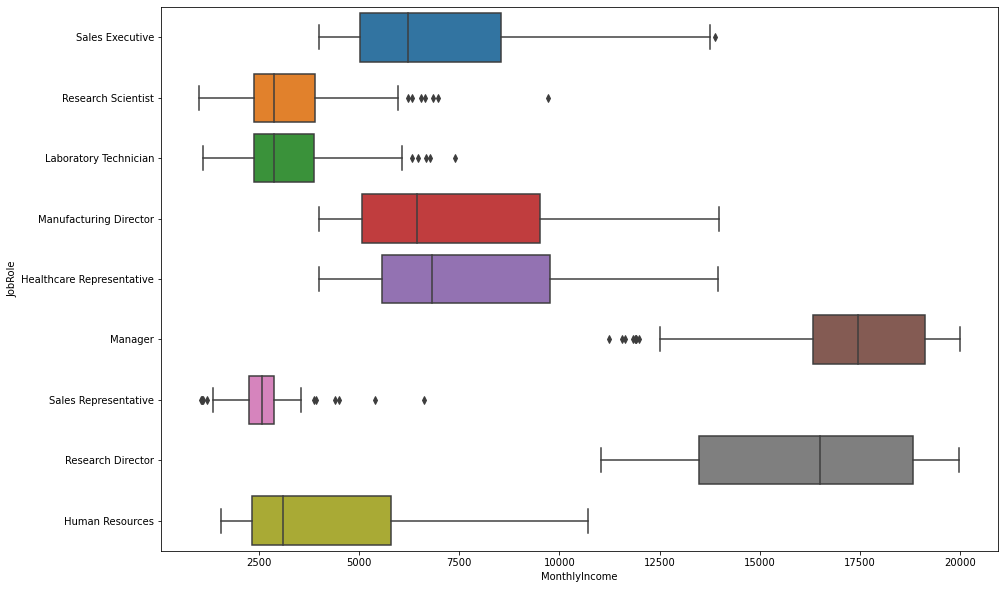

In [23]:
plt.figure(figsize=(15,10))
sns.boxplot(x='MonthlyIncome',y='JobRole',data=df)

In [24]:
category=df[['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus']]
category

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married
...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married
1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married
1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married
1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married


In [27]:
df.to_csv('df_employee.csv')